## Gráficos del informe final

Links de interés a la hora de hacer gráficos:  
Letras griegas y Latex  
https://matplotlib.org/stable/tutorials/text/mathtext.html  
Colores  
https://matplotlib.org/stable/gallery/color/named_colors.html  
Legend's location  
https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot  


In [2]:
#Importo librerías
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib
import math
pi = math.pi


In [ ]:
#Fuente
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
tau = 2.3452

### Testeo
Hago un test graficando todos los resultados de una ejecución

In [14]:
#Importo datos
datos_velocidad = genfromtxt('datos/velocentral.txt', delimiter=' ')
datos_evolucion = genfromtxt('datos/evolucion.txt', delimiter=' ')

[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.
 14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.
 21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.
 28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34. ]


Text(0, 0.5, 'm')

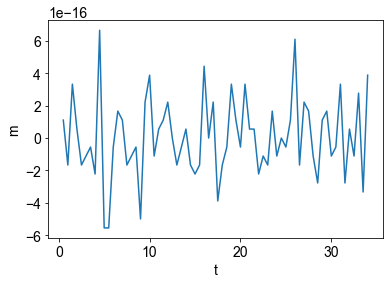

In [18]:
#Conservación de masa

plt.plot(datos_evolucion[:,0], datos_evolucion[:,1], label='Masa(t)')
#Parámetros del gráfico:
# plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('m');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))



# #Guardo el gráfico
# plt.savefig('sol_aprox.pdf', format='pdf',bbox_inches = "tight")


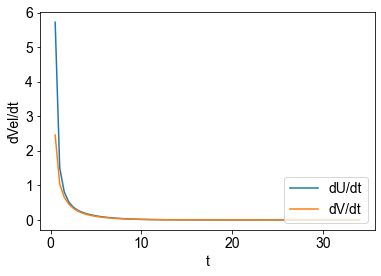

In [21]:
#dUdt y dVdt

#Grafico

#Conservación de masa
plt.plot(datos_evolucion[:,0], datos_evolucion[:,2], label='dU/dt')
plt.plot(datos_evolucion[:,0], datos_evolucion[:,3], label='dV/dt')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('dVel/dt');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

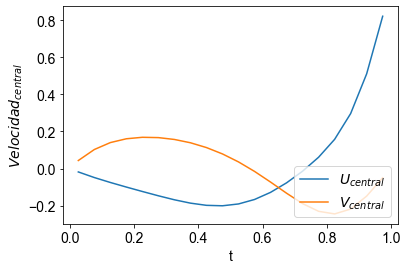

In [23]:
#Velocidad central

#Grafico


plt.plot(datos_velocidad[:,0], datos_velocidad[:,1], label='$U_{central}$')
plt.plot(datos_velocidad[:,0], datos_velocidad[:,2], label='$V_{central}$')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('x/y')
plt.ylabel('$Velocidad_{central}$');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

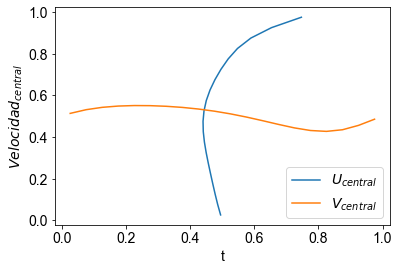

In [25]:
#Velocidad central adimensionalizada y graficada sobre el recinto

#Grafico

amplitud = 0.3
plt.plot(amplitud*datos_velocidad[:,1] + 0.5, datos_velocidad[:,0], label='$U_{central}$')
plt.plot(datos_velocidad[:,0], amplitud*datos_velocidad[:,2] + 0.5, label='$V_{central}$')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('$Velocidad_{central}$');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

### Inciso b
Grafico para DC2 los errores respecto a los resultados de Guia

In [ ]:
#Resultados de Guia: (copiados directamente del paper)
#orden: Re: [100, 1000, 5000]
guia_ucentral = np.array([-0.20581, -0.06080, -0.03039])
guia_vcentral = np.array([0.05454, 0.02526, 0.00945])

In [ ]:
#Cargo datos
datos_u = genfromtxt('datos/b_ucentral.csv', delimiter=',')
datos_v = genfromtxt('datos/b_vcentral.csv', delimiter=',')

In [41]:
testeo = np.array([[1,2,3],[1,2,3]])
print(testeo.shape[0])

2


In [ ]:
def errores_advectivo(datos_u, datos_v, guia_ucentral,guia_vcentral):
    #Calcula los errores considerando que se cambió el esquema del término advectivo
    #datos_u: datos de la velocidad u central
    #datos_v: datos de la velocidad v central
    #guia_ucentral: datos de la velocidad u central de Guia
    #guia_vcentral: datos de la velocidad v central de Guia

    #Creo la matriz de errores que calcula cuadráticamente los errores para cada valor de n1 y Re
    errores = np.zeros(datos_u.shape)
    for i in range(datos_u.shape[0]):
        for j in range(datos_u.shape[1]):
            errores[i,j] = np.sqrt((datos_u[i,j] - guia_ucentral[j])**2 + (datos_v[i,j] - guia_vcentral[j])**2)
            
    return errores

In [ ]:
#Calculo los errores
errores = errores_advectivo(datos_u, datos_v, guia_ucentral,guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.plot(Re_array, errores[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
# plt.yscale("log")

#Guardo el gráfico
plt.savefig('b_error_Re_vs_n1.pdf', format='pdf',bbox_inches = "tight")

### Inciso c
Es hacer lo mismo que el b pero con otros datos (que se produjeron usando como término advectivo UP1 y QUICK)

In [ ]:
#Cargo datos
datos_u_UP1 = genfromtxt('datos/c_ucentral_UP1.csv', delimiter=',')
datos_v_UP1 = genfromtxt('datos/c_vcentral_UP1.csv', delimiter=',')
datos_u_QUICK = genfromtxt('datos/c_ucentral_QUI.csv', delimiter=',')
datos_v_QUICK = genfromtxt('datos/c_vcentral_QUI.csv', delimiter=',')


In [ ]:
#Calculo los errores
errores = errores_advectivo(datos_u_UP1, datos_v_UP1, guia_ucentral, guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.plot(Re_array, errores[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
# plt.yscale("log")

#Guardo el gráfico
plt.savefig('c_error_UP1_Re_vs_n1.pdf', format='pdf',bbox_inches = "tight")

In [ ]:
#Calculo los errores
errores = errores_advectivo(datos_u_QUICK, datos_v_QUICK, guia_ucentral, guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.plot(Re_array, errores[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
# plt.yscale("log")

#Guardo el gráfico
plt.savefig('c_error_QUICK_Re_vs_n1.pdf', format='pdf',bbox_inches = "tight")

### Inciso d
Calculo el orden de convergencia espacial de UP1 en el cálculo de las velocidades en 2 puntos distintos.

In [ ]:
#Cargo datos
datos_u_solucion = genfromtxt('datos/d_solucion.csv', delimiter=',')
datos_v_solucion = genfromtxt('datos/d_solucion.csv', delimiter=',')
datos_u_UP1 = genfromtxt('datos/d_u_UP1.csv', delimiter=',')
datos_v_UP1 = genfromtxt('datos/d_v_UP1.csv', delimiter=',')

In [ ]:
#Calculo los errores
errores = errores_advectivo(datos_u_UP1, datos_v_UP1, datos_u_solucion, datos_v_solucion)

#Grafico los errores vs n1, una curva para cada Re
Re_array = np.array([1,1000])
n1_array = np.array([10,20,40,60,80])
for i in range(len(Re_array)):
    plt.plot(n1_array, errores[:,i], label='Re = ' + str(Re_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('n1')
plt.ylabel('$e$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
# plt.yscale("log")

#Guardo el gráfico
plt.savefig('d_error_UP1_n1_vs_Re.pdf', format='pdf',bbox_inches = "tight")